# FALTA FER MACO

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('Stress_Dataset.csv')

In [4]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()

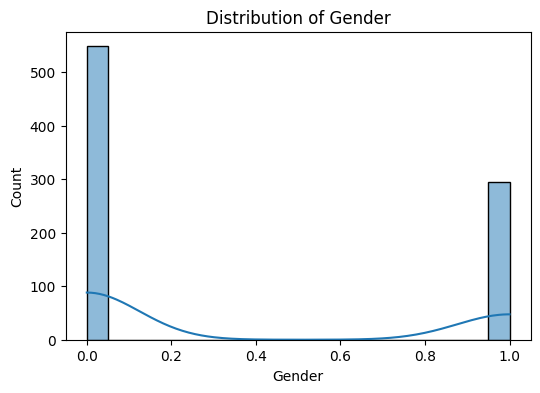

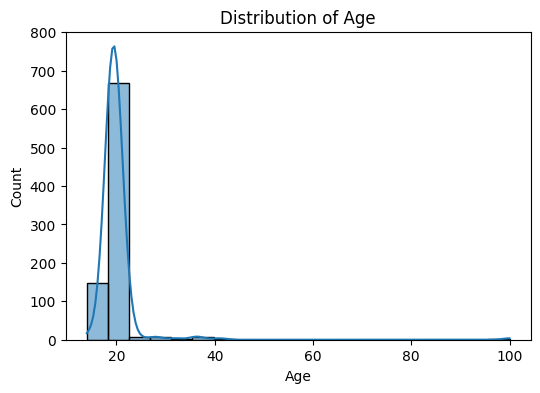

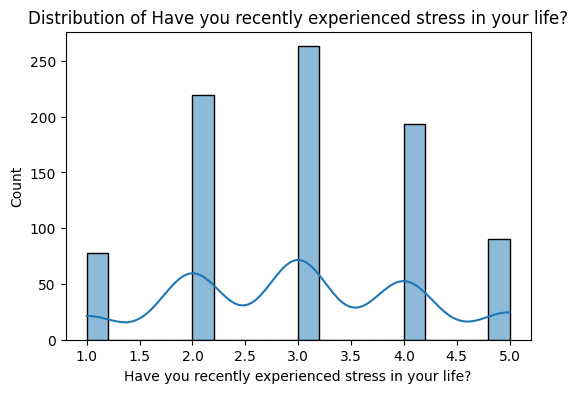

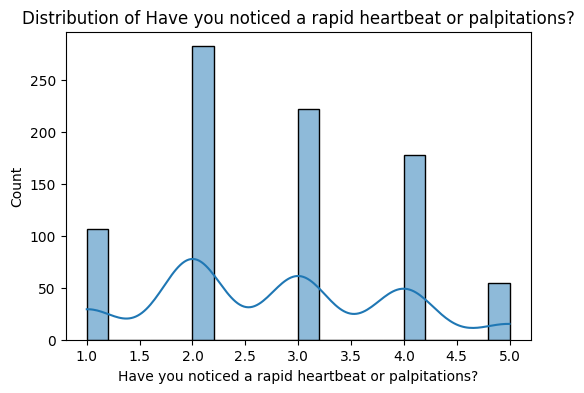

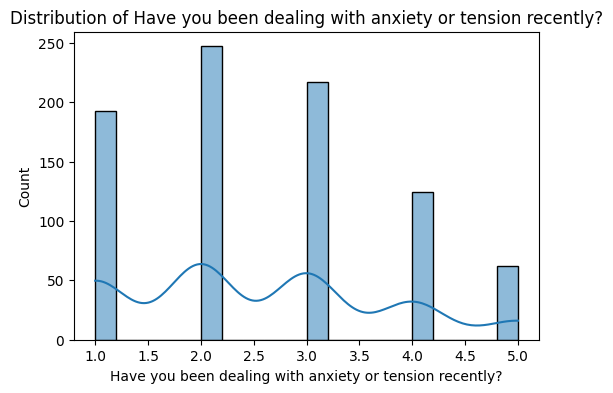

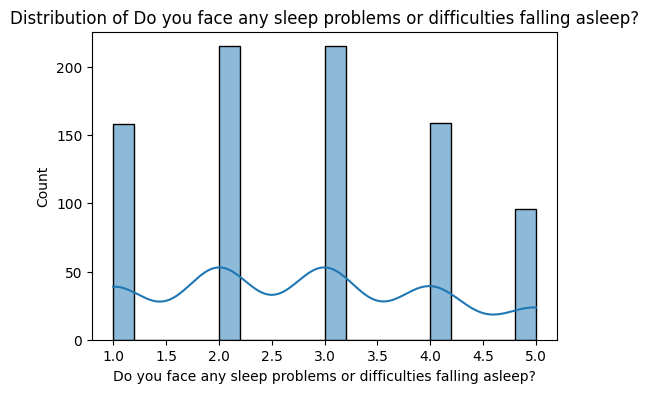

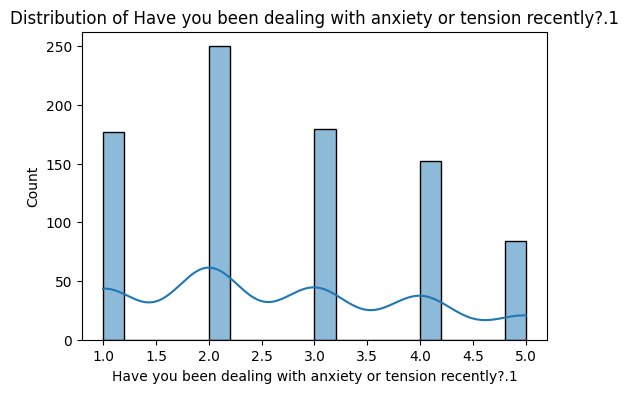

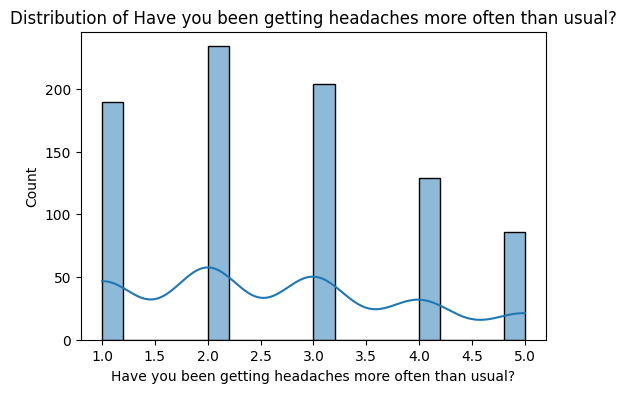

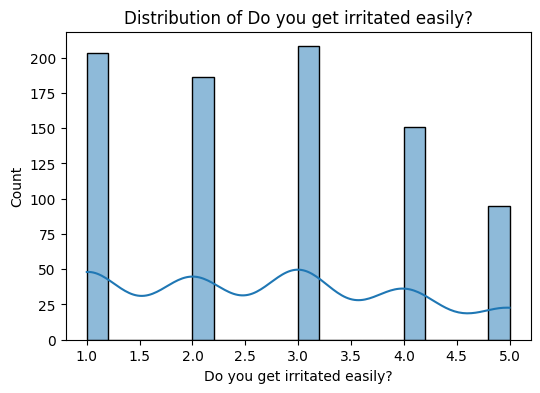

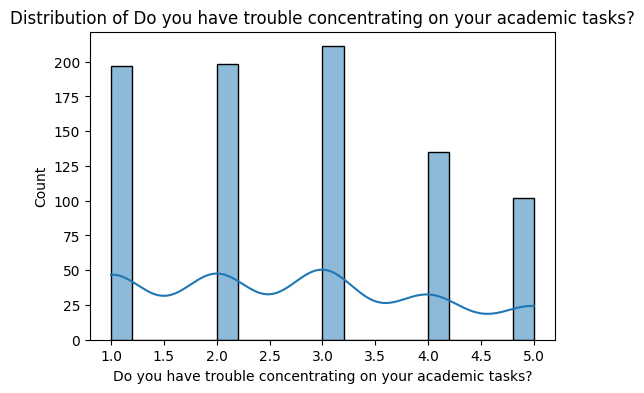

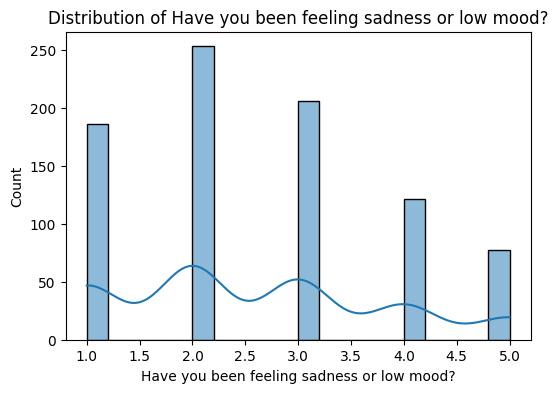

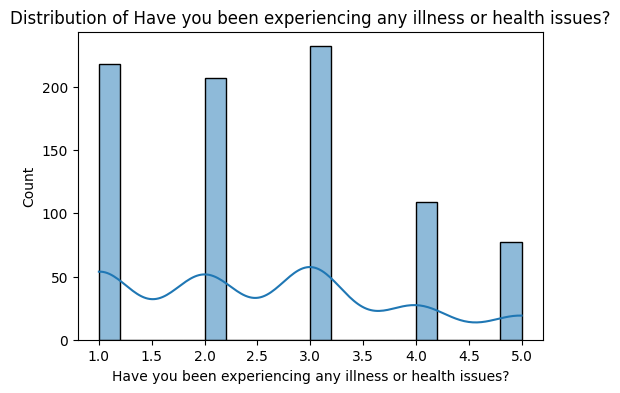

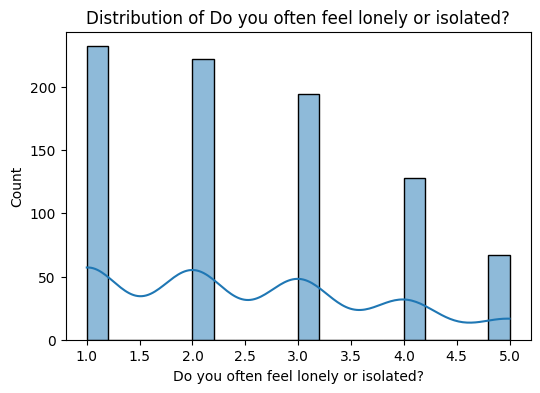

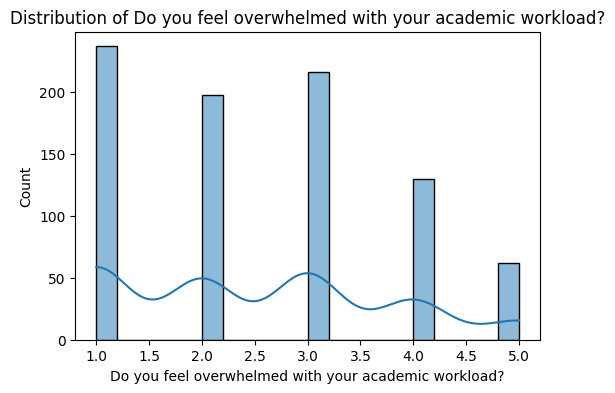

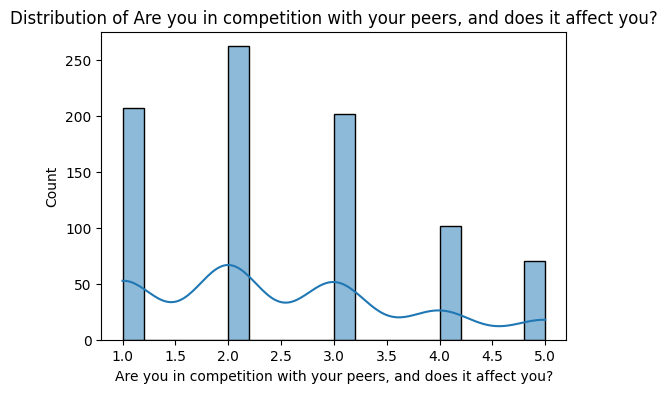

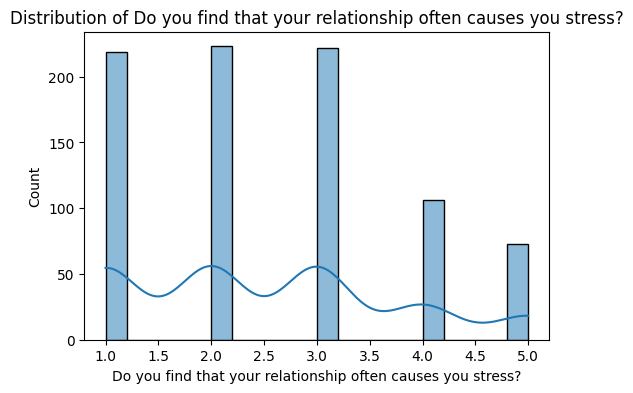

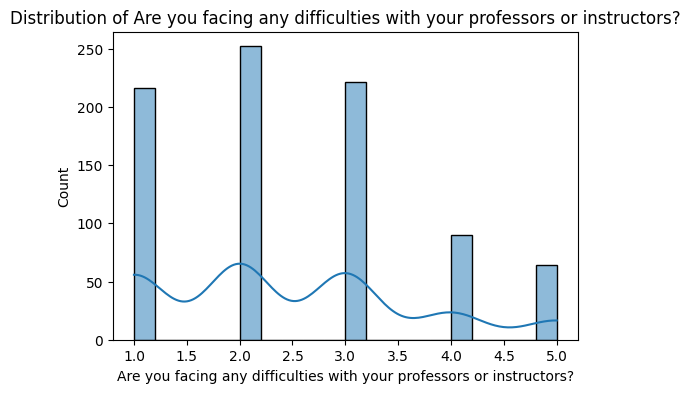

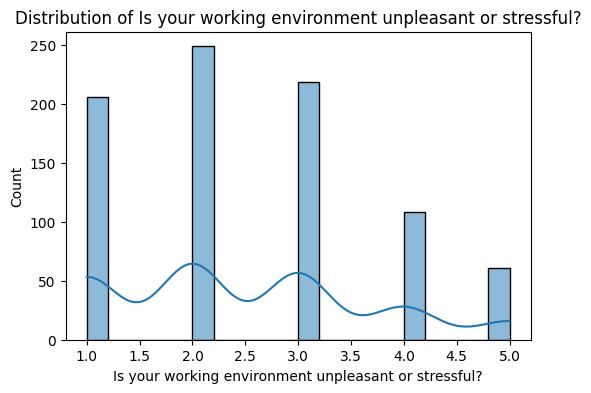

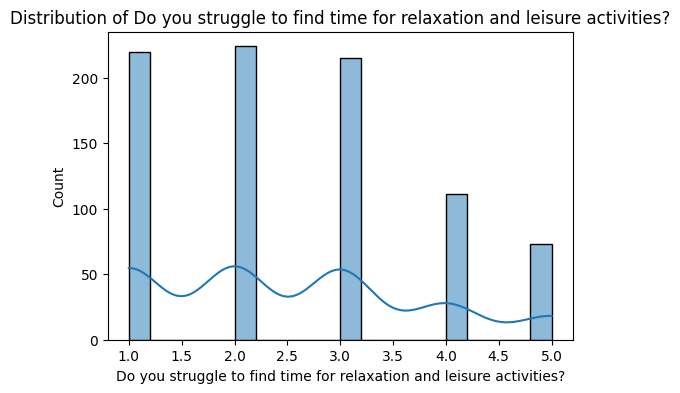

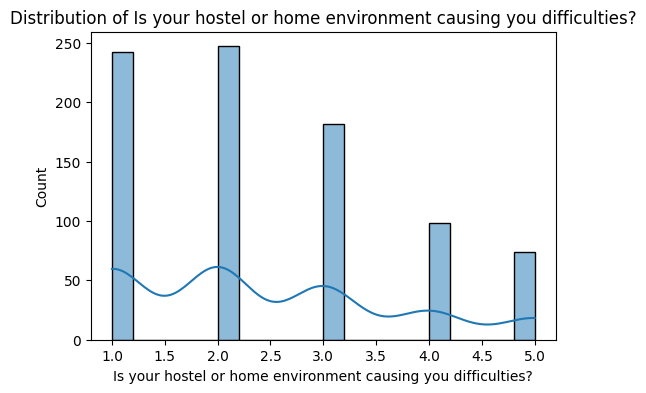

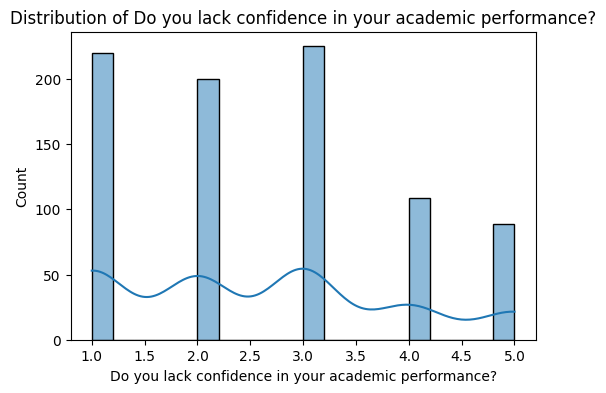

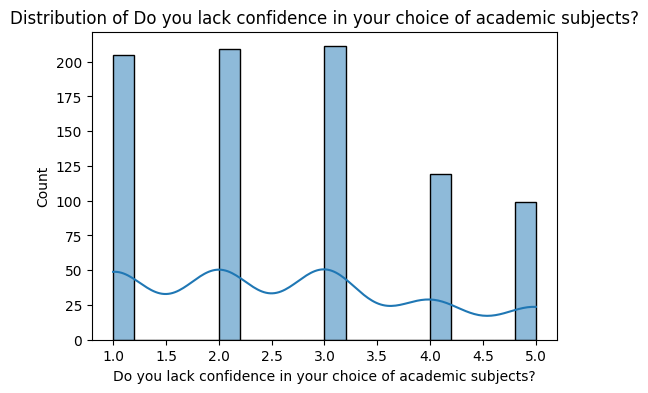

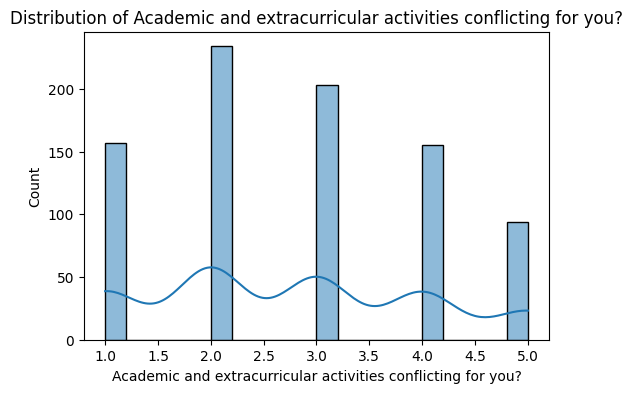

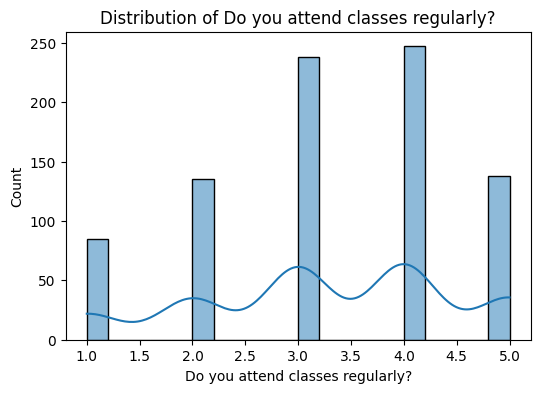

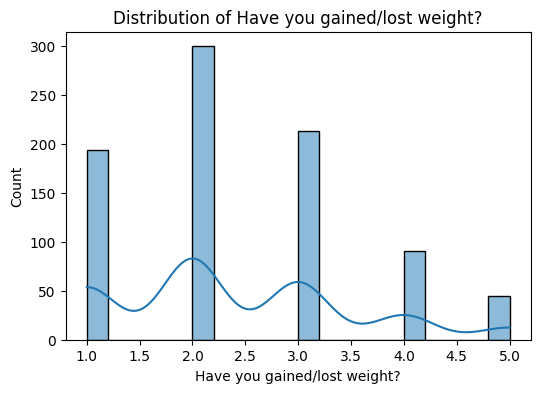

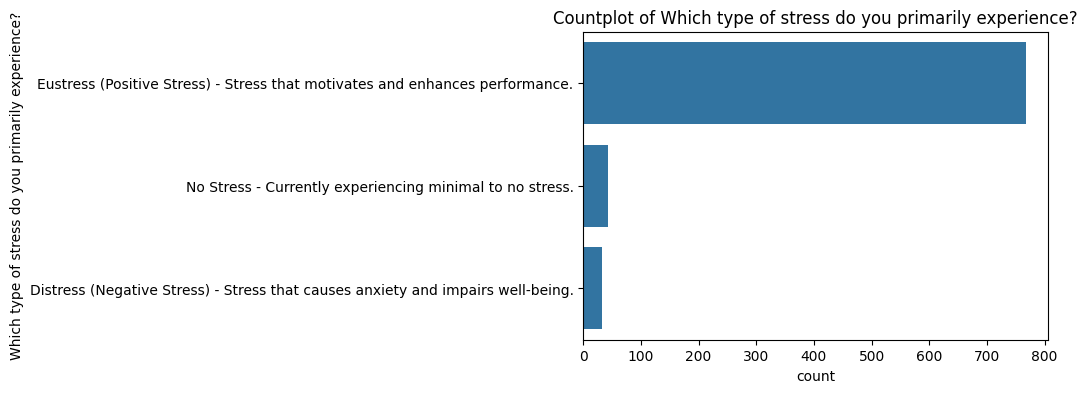

In [5]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()

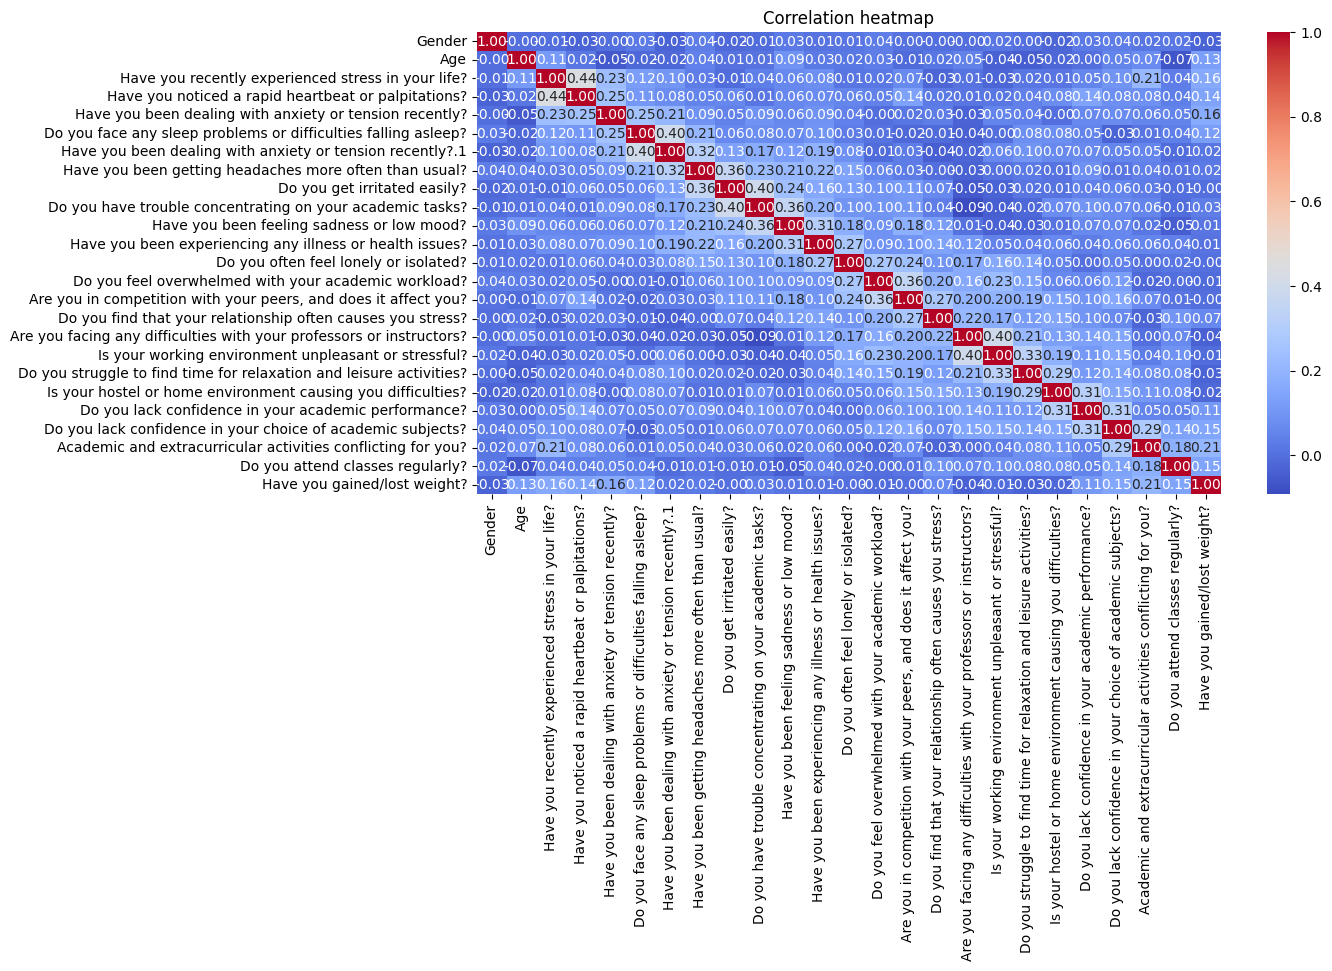

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

In [ ]:
df["Age"].unique() #mirar hi ha anys fora el range que hem establert, pots podriem fer neteja

array([ 20,  21,  19,  18,  14,  17,  36,  22,  28,  41,  32,  37,  15,
        24, 100])

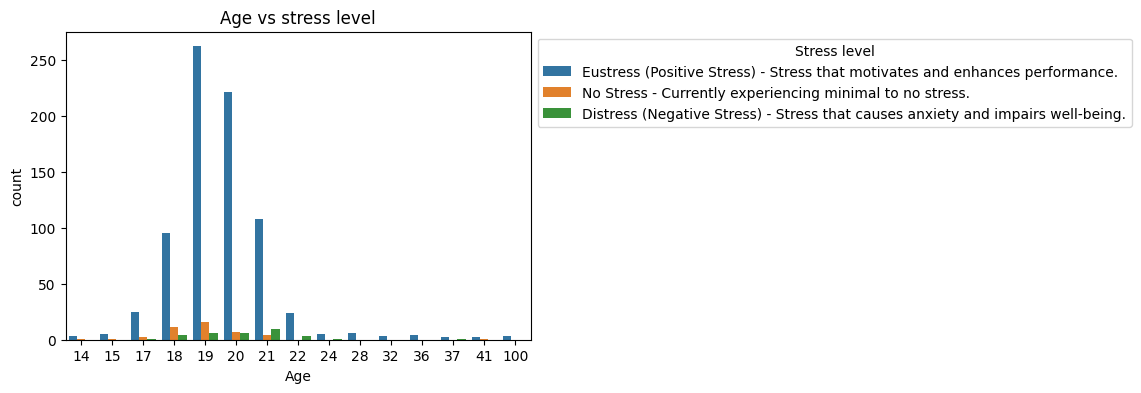

In [12]:
if 'Which type of stress do you primarily experience?' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Age',hue='Which type of stress do you primarily experience?',data=df)
    plt.title("Age vs stress level")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1),title='Stress level')
    plt.show()